In [9]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping

# Model Optimization

* Optimization is difficult:
    * 1000-s of paramters are optimized simultaneously with complex relationships
    * Updates may not improve model meaningfully
    * Updates can be too small or large for low and high learning rate respectively
    
## Stochastic Gradient Descent (SGD)

* Define a model that builds 3 layer neural network for binary classification
* Optimize the model with low, medium and high learning rates and compare loss function results

In [4]:
def build_model(n_features):
    '''Returns neural network for binary classification
    with 3 layers.'''
    model = Sequential([
        Dense(100, activation='relu', input_shape=(n_features, )),
        Dense(100, activation='relu'),
        Dense(2, activation='softmax')
    ])
    return model

# loading the data
titanic = pd.read_csv('data/titanic_all_numeric.csv', header=0)
X = titanic.drop('survived', axis='columns').values
y = to_categorical(titanic.survived.values)

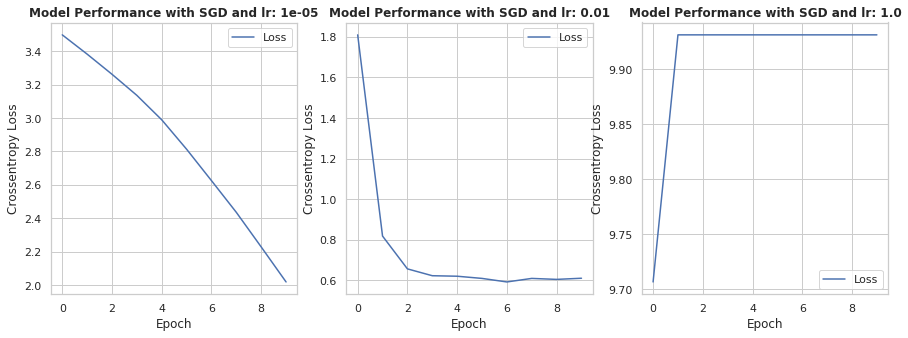

In [19]:
# array of learning rates
l_rates = np.array([1e-5, 0.01, 1])

sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for l_rate, ax in zip(l_rates, axes.ravel()):
      
    model = build_model(X.shape[1]) # create model
    opt = SGD(lr=l_rate) # create optimizer, spwcify learning rate
    
    # compile and fit the model
    model.compile(optimizer=opt, loss='categorical_crossentropy')
    m_fitted = model.fit(x=X, y=y, epochs=10, verbose=0) # verbose=0 supresses progressbar output
    
    ax.plot(m_fitted.history['loss'], label='Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Crossentropy Loss')
    ax.set_title('Model Performance with SGD and lr: {}'.format(l_rate), weight='bold')
    ax.legend()
plt.show()

## The Dying Neuron Problem

* The **ReLU** activation function: 
$
\begin{equation}
    ReLU(z)=
    \begin{cases}
      0, & \text{if}\ z<0 \\
      z, & \text{if}\ z>0
    \end{cases}
\end{equation}
$

* ReLU always ouputs the same value (0) for any input.

<img src="img/deep31.png" alt="Drawing" style="width: 300px;"/>

* Thus, this neuron has no role in determining decision between inputs.
* When this situation is accomplished, ReLU will unlikely recover, because gradient $\frac{\partial E}{\partial w}$ at 0 is 0, which doesn't update the weight values anymore in the new weight equation $w^*=w-lr(\frac{\partial E}{\partial w})$  
* The same problem can happen to **tangens hyperpolicus** activation function, which gradients vanish near -1 and 1

<img src="img/deep32.png" alt="Drawing" style="width: 400px;"/>

## Model Validation

* Model performance on the training data isn't objective indicator for its generalizing performance
* Model performance must be measured with validation data
* Commonly use validation split rather than crossvalidation
* Repeated training from cross-validation would take long time

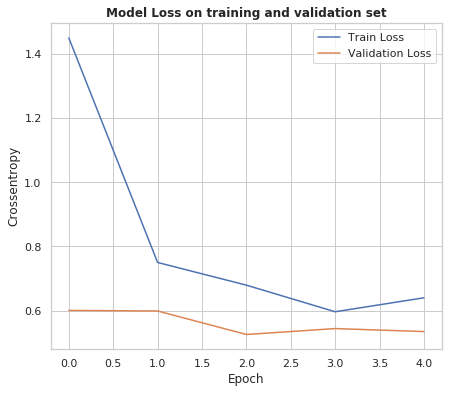

In [25]:
model = build_model(n_features=X.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy')
model_fit = model.fit(X, y, epochs=5, validation_split=0.3, verbose=0)

plt.figure(figsize=(7, 6))
plt.plot(model_fit.history['loss'], label='Train Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Crossentropy')
plt.title('Model Loss on training and validation set', weight='bold')
plt.show()

## Early Stopping

* Our goal is to have the best (as low as) validation loss ass possible. 
* We should keep training while the loss score decreases and stop when it does not decrease anymore. 
* This can be done with Early Stopping.
* Patients parameter: How many epochs we go on without improving our model.
* 2-3 Epochs is usually a good choice

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 1s 1ms/step - loss: 0.9128 - val_loss: 0.6647
Epoch 2/10
623/623 [==============================] - 0s 99us/step - loss: 0.7721 - val_loss: 0.5681
Epoch 3/10
623/623 [==============================] - 0s 77us/step - loss: 0.6571 - val_loss: 0.5504
Epoch 4/10
623/623 [==============================] - 0s 86us/step - loss: 0.6097 - val_loss: 0.5392
Epoch 5/10
623/623 [==============================] - 0s 76us/step - loss: 0.6180 - val_loss: 0.5184
Epoch 6/10
623/623 [==============================] - 0s 82us/step - loss: 0.6126 - val_loss: 0.4925
Epoch 7/10
623/623 [==============================] - 0s 68us/step - loss: 0.5728 - val_loss: 0.5458
Epoch 8/10
623/623 [==============================] - 0s 77us/step - loss: 0.5782 - val_loss: 0.5621


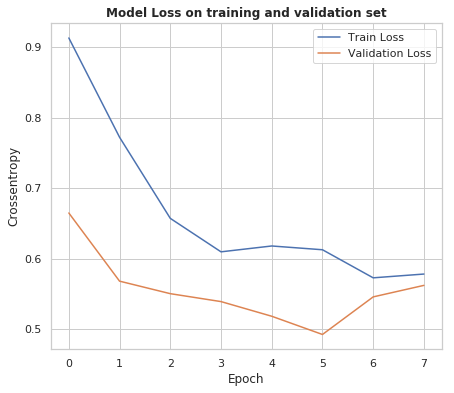

In [29]:
early_stop = EarlyStopping(patience=2)

model = build_model(n_features=X.shape[1])
model.compile(optimizer='adam', loss='categorical_crossentropy')
model_fit = model.fit(X, y, epochs=10, validation_split=0.3, callbacks=[early_stop])

plt.figure(figsize=(7, 6))
plt.plot(model_fit.history['loss'], label='Train Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Crossentropy')
plt.title('Model Loss on training and validation set', weight='bold')
plt.show()

#### Exercise on monitoring model accuracy on validation set

In [2]:
diabetes = pd.read_csv('data/diabetes.csv', header=0)
diabetes.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# standardize (scale) data
X = diabetes.drop('diabetes', axis='columns').values
X_scaled = StandardScaler().fit_transform(X)
y = to_categorical(diabetes["diabetes"].values)

early_stop = EarlyStopping(patience=3)

# create the model
diabetes_model = build_model(n_features=X.shape[1])
diabetes_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
diab_model_fit = diabetes_model.fit(X_scaled, y, validation_split=0.3, epochs=20, 
                                    verbose=0, callbacks=[early_stop])

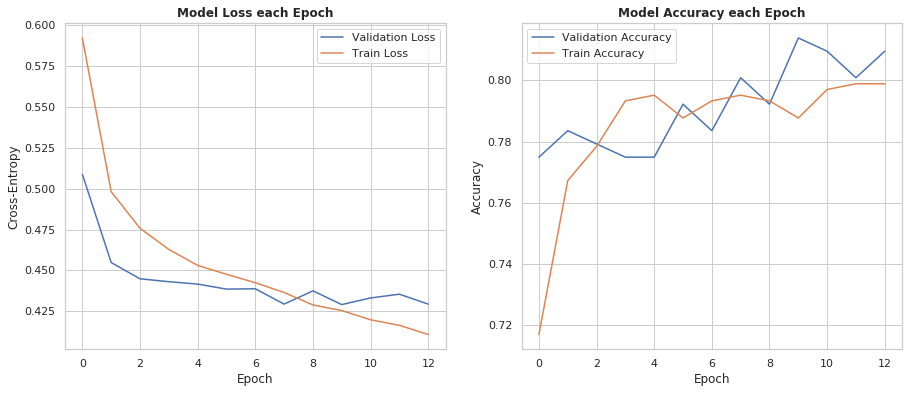

In [41]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(diab_model_fit.history['val_loss'], label='Validation Loss')
plt.plot(diab_model_fit.history['loss'], label='Train Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy')
plt.title('Model Loss each Epoch', weight='bold')

plt.subplot(1,2,2)
plt.plot(diab_model_fit.history['val_acc'], label='Validation Accuracy')
plt.plot(diab_model_fit.history['acc'], label='Train Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy each Epoch', weight='bold')
plt.show()

#### Exercise. Compare two models with different number of nodes in layers

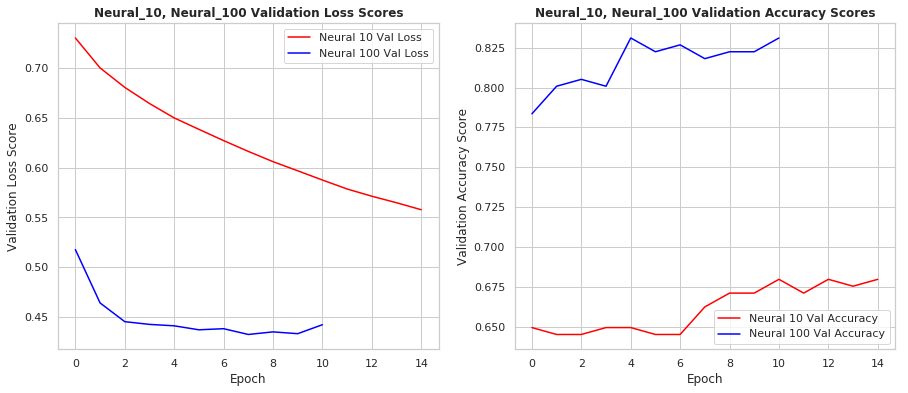

In [7]:
def build_network(n_features, n_nodes):
    model = Sequential([
        Dense(units=n_nodes, activation='relu', input_shape=(n_features, )),
        Dense(n_nodes, activation='relu'),
        Dense(2, activation='softmax')])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

early_stop = EarlyStopping(patience=3) # stopping criteria

# creating models
neural_10 = build_network(X_scaled.shape[1], 10)
neural_10_fit = neural_10.fit(X_scaled, y, epochs=15, validation_split=0.3, 
                              verbose=0,callbacks=[early_stop])
neural_100 = neural_10 = build_network(X_scaled.shape[1], 100)
neural_100_fit = neural_100.fit(X_scaled, y, epochs=15, validation_split=0.3, 
                              verbose=0,callbacks=[early_stop])

sns.set(style='whitegrid')
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(neural_10_fit.history['val_loss'], c='red', label='Neural 10 Val Loss')
plt.plot(neural_100_fit.history['val_loss'], c='blue', label='Neural 100 Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss Score')
plt.legend()
plt.title('Neural_10, Neural_100 Validation Loss Scores', weight='bold')

plt.subplot(1, 2, 2)
plt.plot(neural_10_fit.history['val_acc'], c='red', label='Neural 10 Val Accuracy')
plt.plot(neural_100_fit.history['val_acc'], c='blue', label='Neural 100 Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy Score')
plt.legend()
plt.title('Neural_10, Neural_100 Validation Accuracy Scores', weight='bold')
plt.show()

## Model Capacity

* **Model Capacity**: models ability to capture predictive patterns in data.

<img src="img/deep33.png" alt="Drawing" style="width: 500px;"/>

* We **overfit** if we make accurate predictins on training data but innacurate ones on the validation/test data.
* We **undefit** if model is unable to find patterns in trainign and test set data.
* **Validation/Test set score**, which weren't used for trainign the model is the ultimate measure of model performance.

### Workflow for optimizing model capacity
- Start with a small network
- Gradually increase capacity
- Keep increasing capacity until validation score is no longer improving

<img src="img/deep34.png" alt="Drawing" style="width: 500px;"/>

#### Hand-written Digit Recognition exercise

In [30]:
digits = pd.read_csv('data/mnist.csv', header=None)
X = digits.iloc[:, 1:].values
y = to_categorical(digits.iloc[:, 0].values)

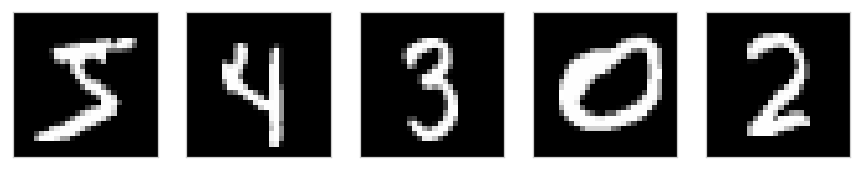

In [32]:
# plot some sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3), 
                         subplot_kw={'xticks': (), 'yticks': ()})
for img, ax in zip(X[:5], axes.ravel()):
    ax.imshow(img.reshape(28, 28), cmap='Greys_r')
plt.show()

In [45]:
# function that builds the models and returns best validation error score
def neural_network(X, y, n_hid_layers, n_nodes):
    early_stop = EarlyStopping(patience=3)
    model = Sequential()
    model.add(Dense(n_nodes, activation='relu', input_shape=(X.shape[1], )))
    for hidden in range(n_hid_layers):
        model.add(Dense(n_nodes, activation='relu'))
        
    model.add(Dense(y.shape[1], activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    model_fit = model.fit(x=X, y=y, validation_split=0.3, epochs=15,
                         verbose=0, callbacks=[early_stop])
    best_loss_score = model_fit.history['val_loss'][-1]
    stopped = len(model_fit.history['val_loss'])
    return print("Layers={}, Nodes={}, Stopped After {} Epochs, Loss Score: {:.3f}".format(
        n_hid_layers,n_nodes, stopped, best_loss_score))

# start experimenting with the capacity, start with small networks
neural_network(X, y, 1, 50)

Layers=1, Nodes=50, Stopped After 10 Epochs, Loss Score: 7.123


In [46]:
neural_network(X, y, 1, 100)

Layers=1, Nodes=100, Stopped After 12 Epochs, Loss Score: 9.384


In [47]:
neural_network(X, y, 2, 100)

Layers=2, Nodes=100, Stopped After 6 Epochs, Loss Score: 11.680


In [48]:
neural_network(X, y, 2, 250)

Layers=2, Nodes=250, Stopped After 6 Epochs, Loss Score: 14.670


In [49]:
neural_network(X, y, 3, 200)

Layers=3, Nodes=200, Stopped After 7 Epochs, Loss Score: 9.725


In [50]:
neural_network(X, y, 2, 250)

Layers=2, Nodes=250, Stopped After 4 Epochs, Loss Score: 13.463


In [51]:
neural_network(X, y, 1, 50)

Layers=1, Nodes=50, Stopped After 15 Epochs, Loss Score: 7.190


In [52]:
neural_network(X, y, 2, 50)

Layers=2, Nodes=50, Stopped After 15 Epochs, Loss Score: 7.042


In [53]:
neural_network(X, y, 2, 25)

Layers=2, Nodes=25, Stopped After 15 Epochs, Loss Score: 1.460


In [54]:
neural_network(X, y, 2, 10)

Layers=2, Nodes=10, Stopped After 15 Epochs, Loss Score: 1.910


In [55]:
neural_network(X, y, 1, 10)

Layers=1, Nodes=10, Stopped After 15 Epochs, Loss Score: 1.990


In [56]:
neural_network(X, y, 3, 10)

Layers=3, Nodes=10, Stopped After 15 Epochs, Loss Score: 1.761


In [59]:
neural_network(X, y, 2, 20)

Layers=2, Nodes=20, Stopped After 15 Epochs, Loss Score: 1.806
